## project

- Task: to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). 
- The dataset: The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

- source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

## target

- What kind of tree will gow in Roosevelt National Forest, Colorado?
- The seven types of cover type (trees) are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

## features

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

- The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

- The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [1]:
# common imports
import numpy as np
import os
import sklearn
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(4)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
test = pd.read_csv('data/test.csv')
test.shape

(565892, 55)

In [5]:
train = pd.read_csv('data/train.csv')
train.shape

(15120, 56)

In [22]:
train.iloc[:, :20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [23]:
train.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Soil_Type6   15120 non-null  int64
 1   Soil_Type7   15120 non-null  int64
 2   Soil_Type8   15120 non-null  int64
 3   Soil_Type9   15120 non-null  int64
 4   Soil_Type10  15120 non-null  int64
 5   Soil_Type11  15120 non-null  int64
 6   Soil_Type12  15120 non-null  int64
 7   Soil_Type13  15120 non-null  int64
 8   Soil_Type14  15120 non-null  int64
 9   Soil_Type15  15120 non-null  int64
 10  Soil_Type16  15120 non-null  int64
 11  Soil_Type17  15120 non-null  int64
 12  Soil_Type18  15120 non-null  int64
 13  Soil_Type19  15120 non-null  int64
 14  Soil_Type20  15120 non-null  int64
 15  Soil_Type21  15120 non-null  int64
 16  Soil_Type22  15120 non-null  int64
 17  Soil_Type23  15120 non-null  int64
 18  Soil_Type24  15120 non-null  int64
 19  Soil_Type25  15120 non-null  int64
dtypes: int

In [25]:
train.iloc[:, 40:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Soil_Type26  15120 non-null  int64
 1   Soil_Type27  15120 non-null  int64
 2   Soil_Type28  15120 non-null  int64
 3   Soil_Type29  15120 non-null  int64
 4   Soil_Type30  15120 non-null  int64
 5   Soil_Type31  15120 non-null  int64
 6   Soil_Type32  15120 non-null  int64
 7   Soil_Type33  15120 non-null  int64
 8   Soil_Type34  15120 non-null  int64
 9   Soil_Type35  15120 non-null  int64
 10  Soil_Type36  15120 non-null  int64
 11  Soil_Type37  15120 non-null  int64
 12  Soil_Type38  15120 non-null  int64
 13  Soil_Type39  15120 non-null  int64
 14  Soil_Type40  15120 non-null  int64
 15  Cover_Type   15120 non-null  int64
dtypes: int64(16)
memory usage: 1.8 MB


- all values are integers

In [30]:
train.iloc[:, :20].head().append(train.iloc[:, :20].tail())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0
15119,15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0


In [33]:
train.iloc[:, 20:40].head().append(train.iloc[:, 20:40].tail())

,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
train.iloc[:, 40:].head().append(train.iloc[:, 40:].tail())

,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
15115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


## - nulls, duplicates and outliers

In [36]:
# checking for nulls

train.iloc[:, :20].isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
dtype: int64

In [37]:
train.iloc[:, 20:40].isnull().sum()

Soil_Type6     0
Soil_Type7     0
Soil_Type8     0
Soil_Type9     0
Soil_Type10    0
Soil_Type11    0
Soil_Type12    0
Soil_Type13    0
Soil_Type14    0
Soil_Type15    0
Soil_Type16    0
Soil_Type17    0
Soil_Type18    0
Soil_Type19    0
Soil_Type20    0
Soil_Type21    0
Soil_Type22    0
Soil_Type23    0
Soil_Type24    0
Soil_Type25    0
dtype: int64

In [38]:
train.iloc[:, 40:].isnull().sum()

Soil_Type26    0
Soil_Type27    0
Soil_Type28    0
Soil_Type29    0
Soil_Type30    0
Soil_Type31    0
Soil_Type32    0
Soil_Type33    0
Soil_Type34    0
Soil_Type35    0
Soil_Type36    0
Soil_Type37    0
Soil_Type38    0
Soil_Type39    0
Soil_Type40    0
Cover_Type     0
dtype: int64

In [39]:
train.isnull().sum().sum()

0

- 0 nulls

In [42]:
train[train.duplicated() == True]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


- 0 duplicates

In [2]:
cont_columns = [ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [3]:
# outliers

# outliers

def number_of_outliers(df):
    
    df = df[[ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [7]:
number_of_outliers(train).sort_values().tail(20)

Elevation                               0
Aspect                                  0
Slope                                  57
Hillshade_3pm                         124
Hillshade_Noon                        393
Hillshade_9am                         408
Horizontal_Distance_To_Hydrology      512
Vertical_Distance_To_Hydrology        586
Horizontal_Distance_To_Fire_Points    645
Horizontal_Distance_To_Roadways       830
dtype: int64

<AxesSubplot:>

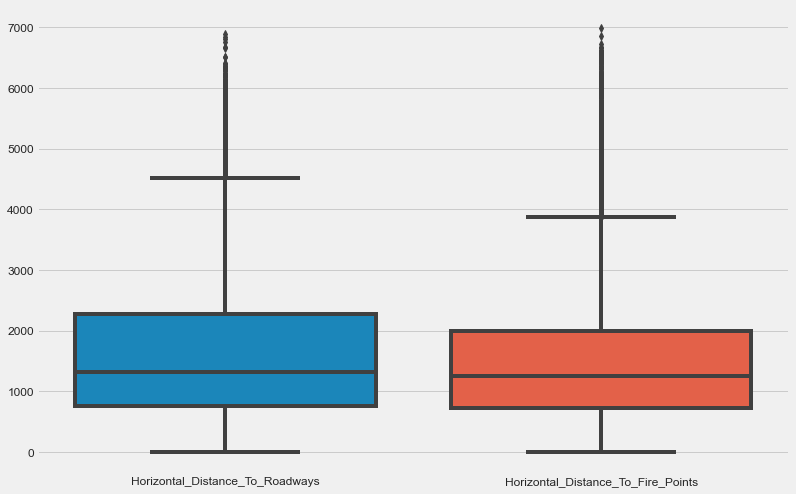

In [48]:
# plot for the outliers in non binary columns
plt.figure(figsize=(12,8))
sns.boxplot(data=train[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']])

## - the target:


In [5]:
# ver muestras por cat del target: bastante balanceada-> ok accuracy 
# #(no bal a partir de 19/90)
train['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

<AxesSubplot:>

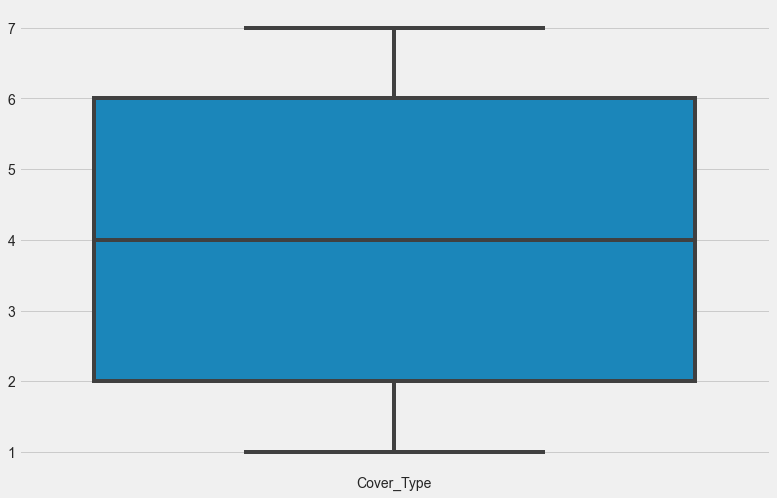

In [6]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train[['Cover_Type']])

OK: it's balanced

## data categories

In [8]:
cont_columns = [ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
    
cat_columns = [ 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

target = 'Cover_Type'

 - distribution of the continuous colums

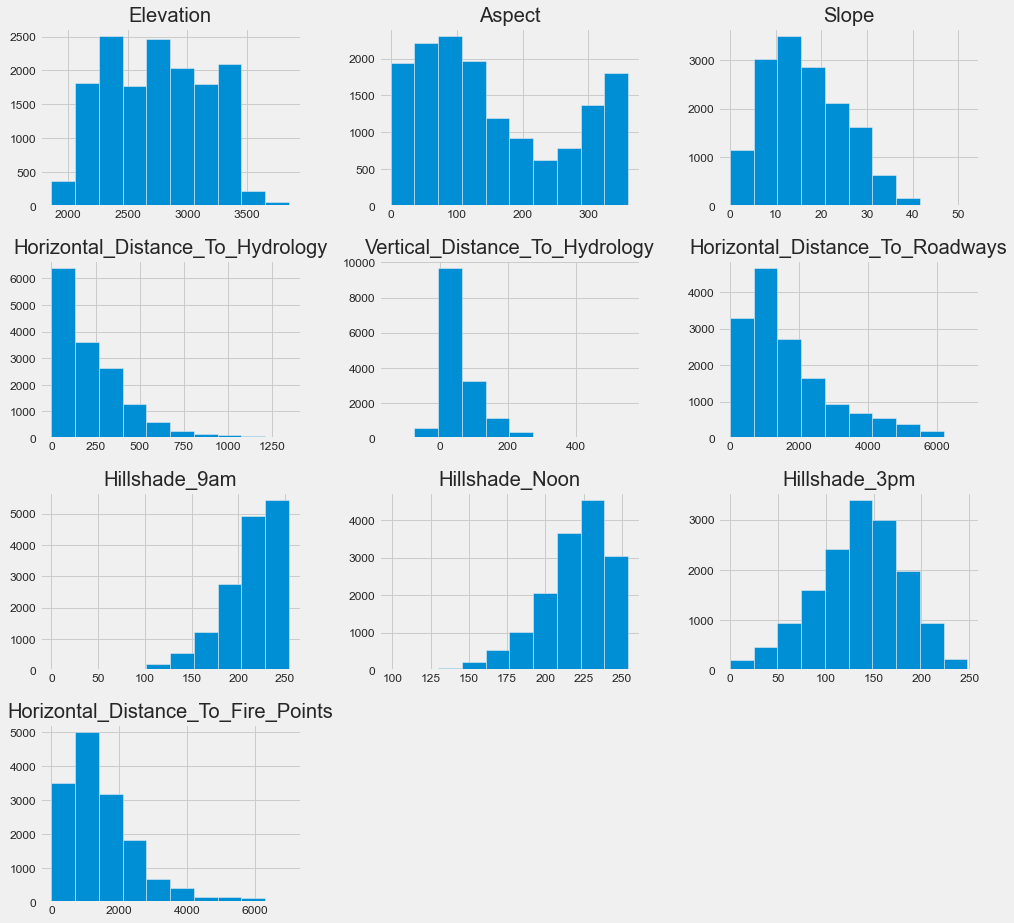

In [54]:
train[cont_columns].hist(figsize=(15,15));

- only Hillshade_3pm is normally distributed


- non-gaussian dist (apply MinMaxScaling)
- gaussian dist (apply StandardScaler) : Hillshade_3pm

In [11]:
abs(train.corrwith(train['Cover_Type'])).sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type38                           0.257810
Soil_Type39                           0.240384
Wilderness_Area1                      0.230117
Soil_Type29                           0.218564
Soil_Type40                           0.205851
Soil_Type22                           0.195993
Soil_Type23                           0.158762
Soil_Type32                           0.132312
Soil_Type12                           0.129985
Soil_Type10                           0.128972
Wilderness_Area3                      0.122146
Soil_Type35                           0.114327
Id                                    0.108363
Horizontal_Distance_To_Roadways       0.105662
Soil_Type24                           0.100797
Hillshade_Noon                        0.098905
Horizontal_Distance_To_Fire_Points    0.089389
Slope                                 0.087722
Soil_Type31                           0.079882
Soil_Type33                           0.078955
Wilderness_Ar

In [12]:
train['Soil_Type7'].unique()

array([0], dtype=int64)

In [13]:
train['Soil_Type15'].unique()

array([0], dtype=int64)

In [14]:
correlatio = train[['Cover_Type','Soil_Type38', 'Soil_Type39', 'Wilderness_Area1', 'Soil_Type29', 'Soil_Type40', 'Soil_Type22']]

<AxesSubplot:>

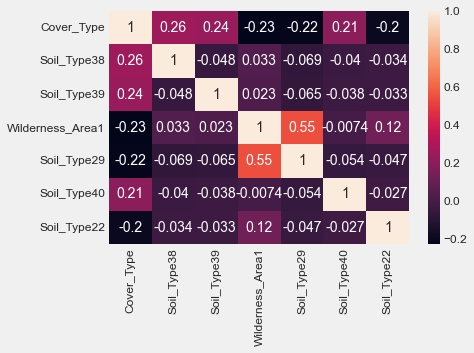

In [15]:
sns.heatmap(correlatio.corr(), annot=True)

In [ ]:
X = train[['Soil_Type38', 'Soil_Type39', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type22' ]]
y = train['Cover_Type']

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler_mms = MinMaxScaler()

test[['Slope','Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']] = scaler_mms.fit_transform(test[['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']])
train[['Slope','Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']] = scaler_mms.fit_transform(train[['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']])

In [118]:
from sklearn.preprocessing import StandardScaler
scaler_ss = MinMaxScaler()

test[['Hillshade_3pm']] = scaler_ss.fit_transform(test[['Slope', 'Hillshade_3pm']])
train[['Hillshade_3pm']] = scaler_ss.fit_transform(train[['Slope', 'Hillshade_3pm']])

In [138]:
train.shape

(15120, 56)

In [139]:
test.shape

(565892, 55)

In [141]:
train.to_csv('train_scaled.csv', index=False)

In [142]:
test.to_csv('test_scaled.csv', index=False)

In [119]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,...,0,0,0,0,0,0,0,0,0,5
1,2,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,...,0,0,0,0,0,0,0,0,0,5
2,3,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,...,0,0,0,0,0,0,0,0,0,2
3,4,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,...,0,0,0,0,0,0,0,0,0,2
4,5,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,...,0,0,0,0,0,0,0,0,0,5


In [120]:
train.iloc[:, :20].describe().round(2)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5
count,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00
mean,7560.50,0.45,0.44,0.32,0.17,0.28,0.25,0.84,0.77,0.54,0.22,0.24,0.03,0.42,0.31,0.02,0.04,0.06,0.06,0.01
std,4364.91,0.21,0.31,0.16,0.16,0.09,0.19,0.12,0.15,0.19,0.16,0.43,0.18,0.49,0.46,0.15,0.20,0.24,0.23,0.10
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3780.75,0.26,0.18,0.19,0.05,0.22,0.11,0.77,0.70,0.43,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7560.50,0.45,0.35,0.29,0.13,0.25,0.19,0.87,0.80,0.56,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,11340.25,0.62,0.72,0.42,0.25,0.32,0.33,0.93,0.88,0.67,0.28,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
max,15120.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [126]:
abs(train.corrwith(train['Cover_Type'])).sort_values(ascending=False).head(7)

Cover_Type          1.000000
Soil_Type38         0.257810
Soil_Type39         0.240384
Wilderness_Area1    0.230117
Soil_Type29         0.218564
Soil_Type40         0.205851
Soil_Type22         0.195993
dtype: float64

In [136]:
correlatio = train[['Cover_Type','Soil_Type38', 'Soil_Type39', 'Wilderness_Area1', 'Soil_Type29', 'Soil_Type40', 'Soil_Type22']]

<AxesSubplot:>

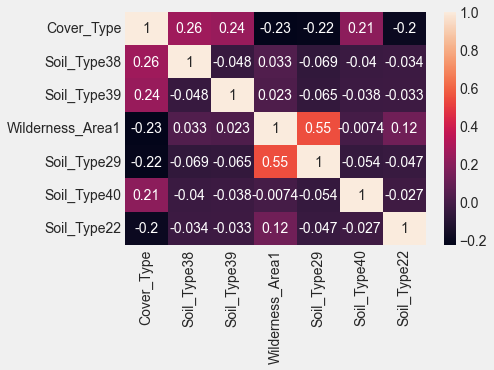

In [137]:
sns.heatmap(correlatio.corr(), annot=True)

In [ ]:
# Soil_Type38         0.257810
# Soil_Type39         0.240384
# Wilderness_Area1    0.230117

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X, y = train.drop("Cover_Type", axis=1), train["Cover_Type"]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                               feature         VIF
0                                   Id    1.395556
1                            Elevation   12.210669
2                               Aspect    1.958110
3                                Slope    9.372777
4     Horizontal_Distance_To_Hydrology    2.459628
5       Vertical_Distance_To_Hydrology    2.247968
6      Horizontal_Distance_To_Roadways    2.094913
7                        Hillshade_9am  121.233223
8                       Hillshade_Noon   46.393454
9                        Hillshade_3pm  183.408121
10  Horizontal_Distance_To_Fire_Points    1.739212
11                    Wilderness_Area1         inf
12                    Wilderness_Area2         inf
13                    Wilderness_Area3         inf
14                    Wilderness_Area4         inf
15                          Soil_Type1         inf
16                          Soil_Type2         inf
17                          Soil_Type3         inf
18                          Soi

- create new features from those

In [54]:
# none works, NO RELATED with feat with corr
# # add new features from feature engineering
# train['Elev_to_Horizontal_Hyd'] = train.Elevation - 0.2 * train.Horizontal_Distance_To_Hydrology 
# train['Elev_to_Horizontal_Road'] = train.Elevation - 0.05 * train.Horizontal_Distance_To_Roadways  
# train['Elev_to_Verticle_Hyd'] = train.Elevation - train.Vertical_Distance_To_Hydrology 
# train['Mean_Horizontal_Dist'] = (train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + 
#                                  train.Horizontal_Distance_To_Roadways)/3 
# train['Mean_Fire_Hydro'] = (train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology)/2

In [125]:
X, y = train.drop("Cover_Type", axis=1), train["Cover_Type"]
X.values

array([[1.00000000e+00, 3.69083585e-01, 1.41666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.66062437e-01, 1.55555556e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.73816717e-01, 3.86111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.51180000e+04, 3.16717019e-01, 3.72222222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.51190000e+04, 3.14199396e-01, 4.63888889e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.51200000e+04, 3.08157100e-01, 5.47222222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X, y = train.drop("Cover_Type", axis=1), train["Cover_Type"]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
cor = pd.DataFrame(data=train.copy().corrwith(train['Cover_Type']))
cor['feature'] = cor.index
cor.rename(columns = {0:'corr_target'}, inplace = True)

feat_cor = pd.merge(vif_data, cor, on="feature")
# feat_cor.head()
best_feat = feat_cor[(feat_cor['VIF'] < 7) & (feat_cor['corr_target'] > 0.2)]
best_feat

c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,VIF,corr_target


In [ ]:
# from https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline


Prediction accuracy for the normal test dataset with PCA
31.66%


Prediction accuracy for the standardized test dataset with PCA
46.27%


PC 1 without scaling:
[-9.99630997e-01 -1.76156988e-02 -6.57256362e-04  2.54357578e-05
 -4.62791415e-03 -7.71635796e-04  9.86196444e-03 -1.07439553e-05
 -3.71074028e-04 -4.18582655e-04  1.75366838e-02  3.29513853e-05
 -6.27466346e-06 -4.34509238e-05  1.67742019e-05  2.43530712e-06
 -1.65958827e-06  2.32276158e-06 -6.17773188e-06  1.12164852e-06
  2.10850910e-06  0.00000000e+00  3.57014278e-08  6.78391003e-09
 -2.53000910e-06 -2.03574030e-06  3.45410523e-06 -5.18618028e-07
  2.45301654e-07  0.00000000e+00  1.03249945e-08 -8.82981077e-08
  1.13702099e-06  3.96824319e-07  1.28161801e-06 -1.42230886e-07
 -1.37857067e-06  8.77162292e-07 -1.11431110e-06 -1.48888057e-08
 -4.84864520e-07 -1.53583577e-07  6.46649323e-08  1.49651038e-05
  7.42475681e-06 -7.96323108e-07 -3.25965431e-06 -3.29798406e-06
 -2.13882402e-07 -1.09235065e-06 -3.83634541e-08 -1.8991066

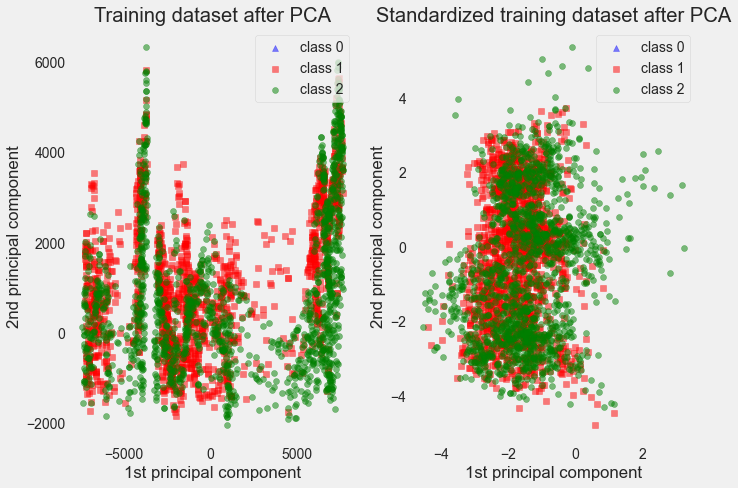

In [25]:
X, y = train.drop("Cover_Type", axis=1), train["Cover_Type"]

RANDOM_STATE = 4
FIG_SIZE = (10, 7)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X=train.drop(['Id','Cover_Type'],axis=1)
Y=train['Cover_Type']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [6]:
knn.score(Xtest,ytest)

0.81005291005291

In [7]:
non_categorical=train.drop(['Id','Cover_Type'],axis=1).columns[:15]
print(non_categorical)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1'],
      dtype='object')


## knn escalado

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in non_categorical:
    train[col]=scaler.fit_transform(train[col].to_frame())
    test[col]=scaler.transform(test[col].to_frame())

In [9]:
from sklearn.model_selection import train_test_split
X=train.drop(['Id','Cover_Type'],axis=1)
y=train['Cover_Type']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
KNN.score(X_test,y_test)

0.7753968253968254

In [19]:
pd.set_option('display.max_columns', None)
print(train.describe())

#Soil_Type7 and Soil_Type15 are 0s for every row hence can be dropped

                Id     Elevation        Aspect         Slope  \
count  15120.00000  1.512000e+04  1.512000e+04  1.512000e+04   
mean    7560.50000  3.609106e-16  1.203035e-16 -2.048920e-16   
std     4364.91237  1.000033e+00  1.000033e+00  1.000033e+00   
min        1.00000 -2.122093e+00 -1.423270e+00 -1.952008e+00   
25%     3780.75000 -8.938338e-01 -8.328021e-01 -7.690867e-01   
50%     7560.50000  6.410523e-03 -2.786705e-01 -1.776260e-01   
75%    11340.25000  8.491925e-01  9.476862e-01  6.504190e-01   
max    15120.00000  2.632921e+00  1.847014e+00  4.199183e+00   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      1.512000e+04                    1.512000e+04   
mean                       4.511382e-17                   -3.759485e-18   
std                        1.000033e+00                    1.000033e+00   
min                       -1.081532e+00                   -3.218239e+00   
25%                       -7.625885e-01         

In [20]:
train.drop(['Soil_Type7','Soil_Type15'],axis='columns',inplace=True)

In [21]:
from sklearn.model_selection import train_test_split
X=train.drop(['Id','Cover_Type'],axis=1)
Y=train['Cover_Type']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knnn=KNeighborsClassifier(n_neighbors=2)
knnn.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [23]:
knnn.score(Xtest,ytest)

0.7595238095238095